# **Feature Selection**

## Filter Methods

Pearson’s Correlation

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Step 1: Create a small dataset
np.random.seed(42)
data = {
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10),
    'target': np.random.rand(10)
}
df = pd.DataFrame(data)

# Step 2: Calculate Pearson correlation
corr1, _ = pearsonr(df['feature1'], df['target'])
corr2, _ = pearsonr(df['feature2'], df['target'])

print(f"Pearson correlation between feature1 and target: {corr1:.2f}")
print(f"Pearson correlation between feature2 and target: {corr2:.2f}")

Pearson correlation between feature1 and target: -0.37
Pearson correlation between feature2 and target: -0.45


Chi-Square Test

In [2]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Create a small categorical dataset
data = np.array([
    ['low', 'yes'],
    ['medium', 'no'],
    ['medium', 'yes'],
    ['high', 'no'],
    ['low', 'yes'],
    ['high', 'no'],
])

# Step 2: Encode the categorical features and target
label_encoder = LabelEncoder()
X = label_encoder.fit_transform(data[:, 0])  # First column is feature (low, medium, high)
y = label_encoder.fit_transform(data[:, 1])  # Second column is target (yes, no)

# Step 3: Perform Chi-Square Test
chi_scores, p_values = chi2(X.reshape(-1, 1), y)
print(f"Chi-Square statistic: {chi_scores[0]:.2f}, p-value: {p_values[0]:.2f}")

Chi-Square statistic: 0.67, p-value: 0.41


ANOVA (Analysis of Variance)

In [3]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif
import pandas as pd

# Step 1: Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target (3 different species)

# Step 2: Apply ANOVA (f_classif) to test significance of features
F_values, p_values = f_classif(X, y)

# Step 3: Display results
for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: F-value = {F_values[i]:.2f}, p-value = {p_values[i]:.3f}")


sepal length (cm): F-value = 119.26, p-value = 0.000
sepal width (cm): F-value = 49.16, p-value = 0.000
petal length (cm): F-value = 1180.16, p-value = 0.000
petal width (cm): F-value = 960.01, p-value = 0.000


Kendall's and Spearman's Rank Correlation

In [4]:
from scipy.stats import spearmanr

# Step 1: Create a small dataset
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 9, 2, 6, 4],
    'target': [3, 2, 1, 5, 4]
}

df = pd.DataFrame(data)

# Step 2: Calculate Spearman's rank correlation
spearman_corr, _ = spearmanr(df['feature1'], df['target'])
print(f"Spearman's correlation between feature1 and target: {spearman_corr:.2f}")


Spearman's correlation between feature1 and target: 0.50


## Wrapper Methods

Recursive Feature Elimination (RFE) with SVM

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [7]:
# Step 2: Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [8]:
# Step 3: Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Step 4: Initialize an SVM model with a linear kernel
svm_model = SVC(kernel='linear')

In [10]:
# Step 5: Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=svm_model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)

In [11]:
# Step 6: Check which features were selected
selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['mean radius', 'mean concavity', 'mean concave points', 'radius error',
       'texture error', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')


In [12]:
# Step 7: Train the model using only the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
svm_model.fit(X_train_rfe, y_train)

SVC(kernel='linear')

In [13]:
# Step 8: Make predictions and evaluate the performance
y_pred = svm_model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with selected features: {accuracy:.2f}")

Model accuracy with selected features: 0.93


## Embedded Methods

Lasso (L1 Regularization) as an Embedded Method

In [16]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [17]:
# Step 2: Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [18]:
# Step 3: Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Step 4: Initialize the Lasso Regression model (L1 regularization)
lasso = Lasso(alpha=0.1)


In [20]:
# Step 5: Fit the model to the training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [21]:
# Step 6: Check which features were selected (non-zero coefficients)
selected_features = X_train.columns[(lasso.coef_ != 0)]
print("Selected Features by Lasso:", selected_features)

Selected Features by Lasso: Index(['MedInc', 'HouseAge', 'Population', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')


In [22]:
# Step 7: Make predictions using the selected features
y_pred = lasso.predict(X_test)

In [23]:
# Step 8: Evaluate model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Lasso-selected features: {mse:.2f}")

Mean Squared Error with Lasso-selected features: 0.60


# **Dimension reduction**

PCA for Dimensionality Reduction

In [25]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
# Step 2: Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [27]:
# Step 3: Standardize the data (PCA works best when data is normalized)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Step 4: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

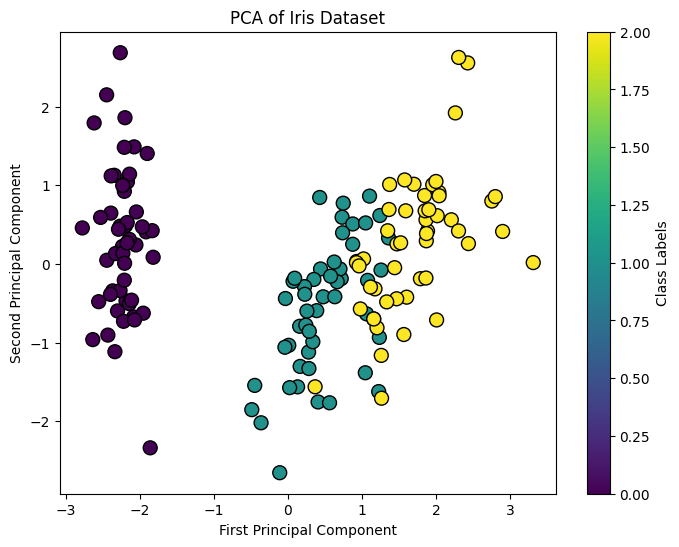

In [29]:
# Step 5: Visualize the transformed data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Class Labels')
plt.show()